In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [8]:
np.random.seed(42)
#Generate train data
X = 0.3 * np.random.randn(100, 2)
#Generate some abnormal observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20,2))
X = np.r_[X + 2, X - 2, X_outliers]

In [9]:
#fit the model
clf = LocalOutlierFactor(n_neighbors=20)
y_pred = clf.fit_predict(X)
y_pred_outliers = y_pred[200:]

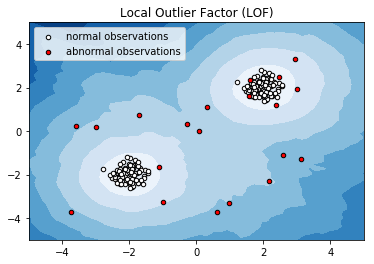

In [15]:
# plot the level sets of the decision function
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
               edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
               edgecolor='k', s=20)

plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
          ["normal observations",
          "abnormal observations"],
          loc="upper left")
plt.show()
